result:  



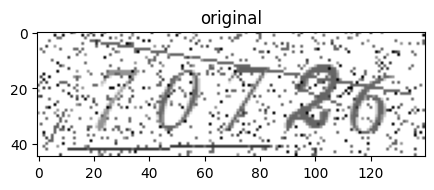

In [11]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pytesseract

path = '/Users/syuan/captcha2/img/img215.png'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) #讀入灰階圖片。
plt.figure(figsize=(5, 6))
plt.title('original')
plt.imshow(img, cmap='gray')
print('result:', pytesseract.image_to_string(img, lang = 'eng')) #進行OCR辨識，回傳None，表示無法辨識。

# Image pre-processing

result after denosing: 707 86



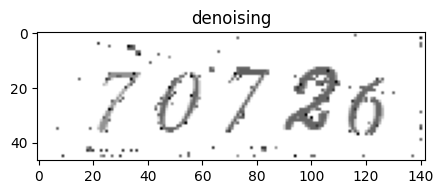

In [12]:
col = len(img[0])
row = len(img)
#在圖的外圍加一圈pixel，防止index error。
b = np.array([[255] for i in range(45)])
new_arr = np.append(img, b, axis=1)
new_arr2 = np.array([np.insert(row, 0, 255) for row in new_arr])
c = [[255]*142]
new_arr3 = np.append(new_arr2, c, axis=0)
dst = np.vstack((c, new_arr3)).astype(dtype='uint8')

#觀察到圖片噪點幾乎都是單一pixel，且也有橫/斜線，因此遍歷圖上所有pixel，若上下或左右皆是白色，則將此pixel設為白色。
for i in range(1, row):
    for j in range(1, col):
        if dst[i-1][j] == 255 and dst[i+1][j] == 255:
            dst[i][j] = 255
        elif dst[i][j-1] == 255 and dst[i][j+1] == 255:
            dst[i][j] = 255
plt.figure(figsize=(5, 6))
plt.title('denoising')
plt.imshow(dst, cmap='gray')
print('result after denosing:', pytesseract.image_to_string(dst, lang = 'eng'))#已能辨識出部分數字

result after sharpening: 70726



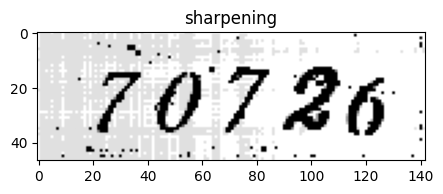

In [13]:
#強化線條
blur_img = cv2.GaussianBlur(dst, (0, 0), 100)#先用高斯模糊
usm = cv2.addWeighted(dst, 0.5, blur_img, -0.5, 0)#以原圖:模糊圖片=0.5:-0.5的比例進行混合，得到銳化後的圖片
plt.figure(figsize=(5, 6))
plt.title('sharpening')
plt.imshow(usm, cmap='gray')
dst = np.array(usm, dtype = np.uint8)
print('result after sharpening:', pytesseract.image_to_string(dst, lang = 'eng'))#回傳正確數字